In [10]:
import torch
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import seaborn as sns

repo_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
sys.path.append(repo_root)


from src.utils import MNIST, total_variation_loss_model, evaluate_loss_acc
from src.model import CNN, MLP
from src.utils import MNIST, evaluate_loss_acc, LOGGER

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

In [11]:
DEVICE = "mps"

# Папка с чекпоинтами
CHECKPOINT_DIR = f"{repo_root}/data/checkpoints/exp4"

In [12]:
# key = 'fc2.weight'
# key = 'layer1.0.weight'

ticks = 1
num_epochs = 20
num_seeds = 1
values = []
losses = [] 

for i in range(num_seeds):
    LOGGER.reset()
    LOGGER.load(f'{CHECKPOINT_DIR}/MNIST_CNN_{ticks}tick_steps_{num_epochs}epochs_({i}_{num_seeds})seeds')
    # values.append(LOGGER.dict[key])

    losses.append(LOGGER.dict['loss'])

losses = np.array(losses)
values = np.array(values)

In [13]:
values.shape

(0,)

In [14]:
# len_trajectory = values.shape[1]
values.shape , losses.shape

((0,), (1, 18760))

In [16]:
# last_n = values.shape[1]
last_n = 1000

/var/folders/nn/by81v1n504z14cq7hr74_5g80000gn/T/ipykernel_44516/3439467818.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("tab10", num_seeds)


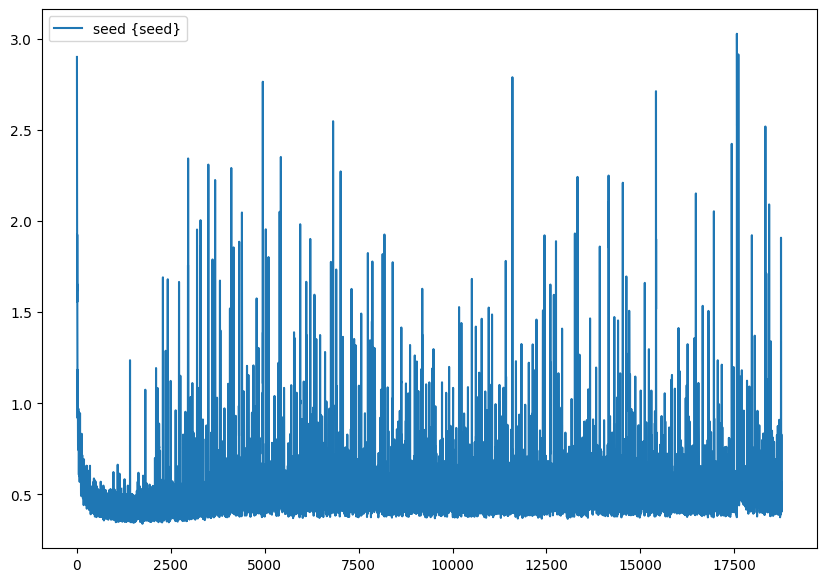

In [17]:
# Визуализация
plt.figure(figsize=(10, 7))
cmap = cm.get_cmap("tab10", num_seeds)
colors = [cmap(i) for i in range(num_seeds)]
for seed in range(num_seeds):
    plt.plot(losses[seed], label='seed {seed}', color = colors[seed] )

plt.legend()
plt.show()